In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_blobs
from sklearn.feature_selection import  f_classif
from sklearn import decomposition
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from itertools import cycle
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

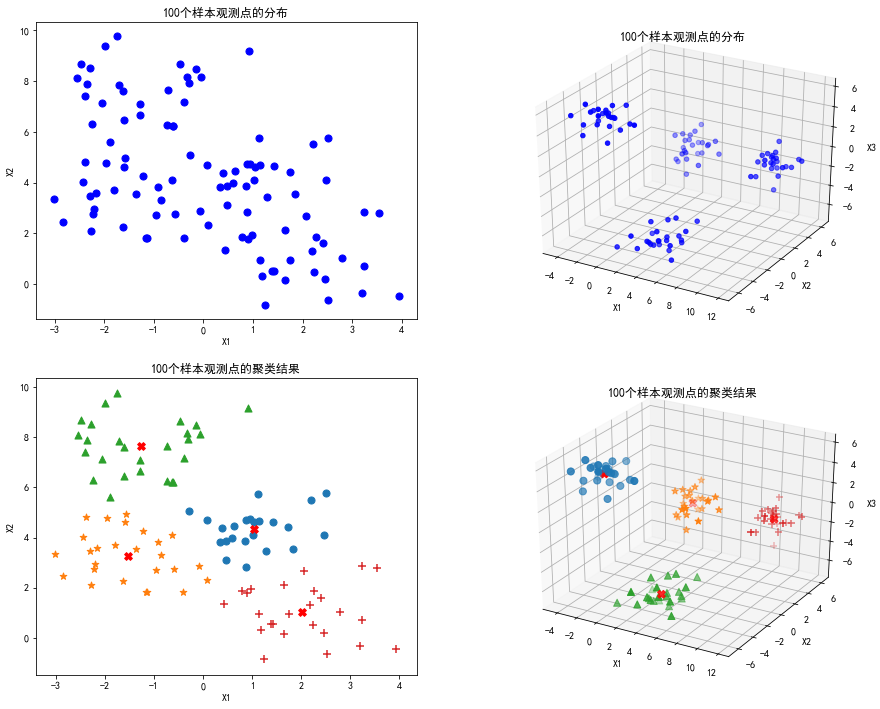

In [2]:
N=100
X1, y1 = make_blobs(n_samples=N, centers=4, n_features=2,random_state=0)
X2, y2 = make_blobs(n_samples=N, centers=4, n_features=3,random_state=123)
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.scatter(X1[:,0],X1[:,1],c='blue',s=50)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("%d个样本观测点的分布"%N)
ax=plt.subplot(222, projection='3d')
ax.scatter(X2[:,0],X2[:,1],X2[:,2],c='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("%d个样本观测点的分布"%N)

KM= KMeans(n_clusters=4, n_jobs = 4, max_iter = 500)
KM.fit(X1) 
labels=np.unique(KM.labels_)
plt.subplot(223)
markers='o*^+' 
for i,label in enumerate(labels):
    plt.scatter(X1[KM.labels_==label,0],X1[KM.labels_==label,1],label="cluster %d"%label,marker=markers[i],s=50)
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],marker='X',s=60,c='r',label="小类中心")
#plt.legend(loc="best",framealpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("%d个样本观测点的聚类结果"%N)

KM= KMeans(n_clusters=4, n_jobs = 4, max_iter = 500)
KM.fit(X2) 
ax=plt.subplot(224, projection='3d')
labels=np.unique(KM.labels_)
markers='o*^+' 
for i,label in enumerate(labels):
    ax.scatter(X2[KM.labels_==label,0],X2[KM.labels_==label,1],X2[KM.labels_==label,2],
               label="cluster %d"%label,marker=markers[i],s=50)
ax.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],KM.cluster_centers_[:,2],
           marker='X',s=60,c='r',label="小类中心")
#ax.legend(loc="best",framealpha=0.5)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("%d个样本观测点的聚类结果"%N)
plt.show()


代码说明：
（1）第17，18行：定义K-均值聚类对象，指定将数据聚成4类。最大迭代次数等于500。并发处理（提高计算效率）数等于4。拟合第一组数据。
（2）第19行：获得聚类标签，聚类解存储在K-均值聚类对象的.labels_属性中。
（3）第20至23行：利用for循环可视化聚类解，即以不同颜色和形状的符号分别绘制各小类的散点图。
（4）第24行：将各个小类的类质心添加到图中。
小类的类质心坐标存储在K-均值对象的cluster_centers_属性中。


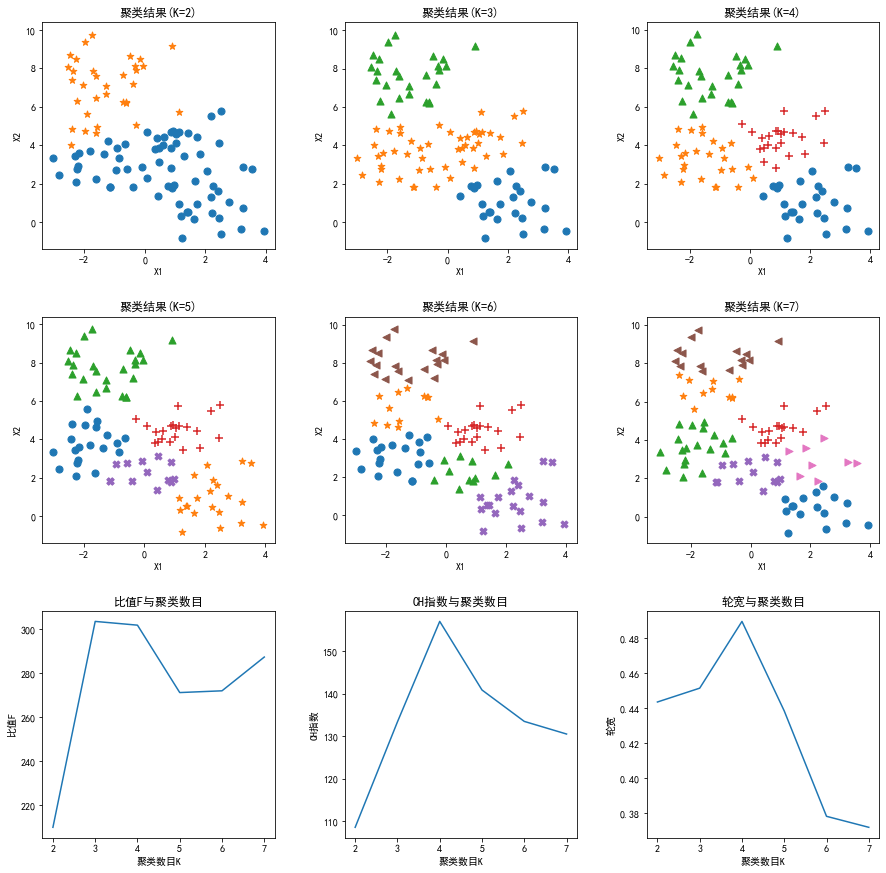

In [3]:
plt.figure(figsize=(15,15))
K=[2,3,4,5,6,7]
markers='o*^+X<>'
Fvalue=[]
silhouettescore=[]
chscore=[]
i=0
for k in K:
    KM= KMeans(n_clusters=k, n_jobs = 4, init='k-means++',random_state=1,max_iter = 500)
    KM.fit(X1) 
    tmp=f_classif(X1, KM.labels_)
    Fvalue.append(sum(tmp[0]))
    score=calinski_harabasz_score(X1,KM.labels_)
    chscore.append(score)
    score=silhouette_score(X1,KM.labels_)    
    silhouettescore.append(score)
    labels=np.unique(KM.labels_)
    plt.subplot(3,3,i+1) 
    i+=1
    for j,label in enumerate(labels):
        plt.scatter(X1[KM.labels_==label,0],X1[KM.labels_==label,1],label="cluster %d"%label,
                    marker=markers[j],s=50)
    #plt.legend(loc="best",framealpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("聚类结果(K=%d)"%k)
    
plt.subplot(3,3,i+1)
plt.plot(K,Fvalue)
plt.xlabel("聚类数目K")
plt.ylabel("比值F")
plt.title("比值F与聚类数目")
plt.subplot(3,3,i+2)
plt.plot(K,chscore)
plt.xlabel("聚类数目K")
plt.ylabel("CH指数")
plt.title("CH指数与聚类数目")
plt.subplot(3,3,i+3)
plt.plot(K,silhouettescore)
plt.xlabel("聚类数目K")
plt.ylabel("轮宽")
plt.title("轮宽与聚类数目")
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)


代码说明：
（1）第2行：将数据尝试聚成2至7个小类，这是实际聚类分析中不可或缺的环节。
（2）第4至6行：定义存储不同聚类数目K下不同聚类评价指标的计算结果。评价指标依次为比值F，轮宽和CH系数。
（3）第8至26行：利用for循环将数据聚成预设的K个小类。计算不同聚类数目数目K下不同聚类评价指标值。可视化聚类解。


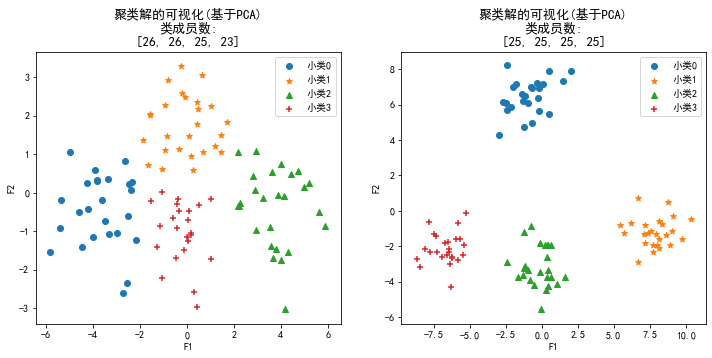

X0的预测类别为：[2]


In [4]:
fig=plt.figure(figsize=(12,5))
pca=decomposition.PCA(n_components=2,random_state=1)
dataname=[X1,X2]
for i,X in enumerate(dataname):
    KM = KMeans(n_clusters=4, n_jobs = 4,init='k-means++',random_state=1,max_iter = 500)
    KM.fit(X)   
    y=pca.fit(X).transform(X)
    labels=np.unique(KM.labels_)
    ax = fig.add_subplot(1,2,i+1)
    for i,label in enumerate(labels):
        ax.scatter(y[KM.labels_==label,0], y[KM.labels_==label,1], marker=markers[i],label="小类%d"%label)
        n1,n2,n3,n4=pd.Series(KM.labels_).value_counts()        
    ax.set_title("聚类解的可视化(基于PCA)\n类成员数:\n%s"%([n1,n2,n3,n4]),fontdict={'size':'13','color':'black'})
    ax.set_xlabel("F1")
    ax.set_ylabel("F2")    
    ax.legend()
plt.show()

##利用聚类模型（三维）预测X0的小类
X0=[[5,5,5]]
print("X0的预测类别为：%s"%KM.predict(X0))

代码说明：
（1）第2行：将借助主成分分析提取两个主成分以展示聚类解的情况。
（2）第4至16行：分别对第一组和第二组数据聚成4类。
其中，第7行对数据进行主成分分析并得到2个主成分；第10，11行绘制两个主成分关于聚类解的散点图，不同颜色和形状的符号表示分属不同的小聚；第12行计算各小类的类成员个数，即小类的样本量。所得图形如图11.3所示。聚类变量个数p>2时，借助主成分分析可视化聚类解，是一种简单且有效的方式。
（3）第20，21行：给出一个新的样本观测X_0，预测其所属的小类。
